In [61]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

datos = pd.read_csv(uri)
datos.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [62]:
nuevos_nombres = {
    	'unfinished': 'No terminado',
      'expected_hours': 'Horas esperadas',
      'price': 'Precio'
}
datos = datos.rename(columns=nuevos_nombres)
datos.head(10)
# Cambiar nombre de los titulos de las columnas

,No terminado,Horas esperadas,Precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [63]:
cambio = {
    0:1,
    1:0
}
datos['Terminado'] = datos['No terminado'].map(cambio)
datos.tail()
# Hacer cambio de valores de no terminado (0) a terminado (1) y viceversa

,No terminado,Horas esperadas,Precio,Terminado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


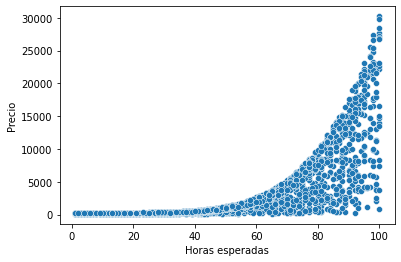

In [64]:
import seaborn as sns

# !pip install seaborn == 0.9.0

sns.scatterplot(x = 'Horas esperadas', y = 'Precio', data = datos);
# Comparacion de horas esperadas y precio

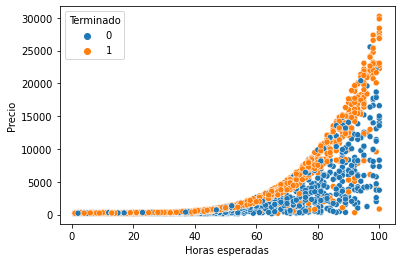

In [65]:
sns.scatterplot(x = 'Horas esperadas', y = 'Precio', data = datos, hue = 'Terminado');


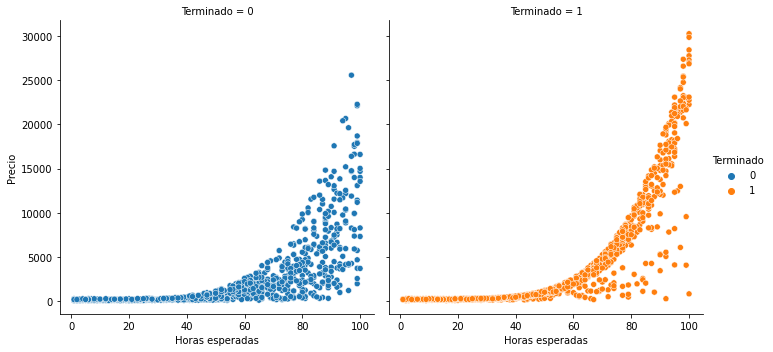

In [66]:
sns.relplot(x = 'Horas esperadas', y = 'Precio', data = datos, hue = 'Terminado', col = 'Terminado');
# relplot muestra dos graficas

In [67]:
x = datos[['Horas esperadas', 'Precio']]
y = datos['Terminado']
# Asignar variables para el modelo

In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)
modelo = LinearSVC()
modelo.fit(train_x, train_y)

pred = modelo.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto %.2f " % (accuracy))

Porcentaje de acieto 56.48 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [69]:
# hacer una comparacion con otro modelo con la libreria numpy, y el modelo entrenado deberia ser mejor

In [70]:
import numpy as np
pred_naive = np.ones(len(test_y))
accuracy = accuracy_score(test_y, pred_naive) * 100

print("Porcentaje de acieto de baseline %.2f " % (accuracy))

Porcentaje de acieto de baseline 52.59 


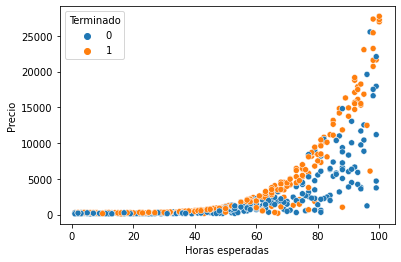

In [71]:
sns.scatterplot(x = 'Horas esperadas', y = 'Precio', data = test_x, hue = test_y);

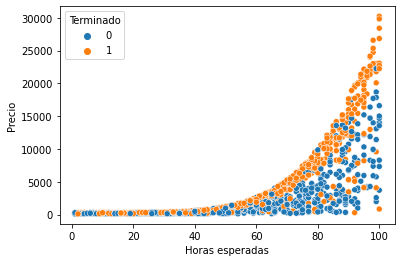

In [72]:
sns.scatterplot(x = 'Horas esperadas', y = 'Precio', data = train_x, hue = train_y);

In [73]:
x_min = test_x['Horas esperadas'].min()
x_max = test_x['Horas esperadas'].max()

y_min = test_x['Precio'].min()
y_max = test_x['Precio'].max()

print(x_min, x_max, y_min, y_max)
# maximos y minimos de horas esperadas y precio

1 100 101 27738


In [74]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)
# construir una malla

In [75]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(puntos)
Z.shape
Z = Z.reshape(xx.shape)
Z
# modelo para verificar si el modelo original esta bien

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

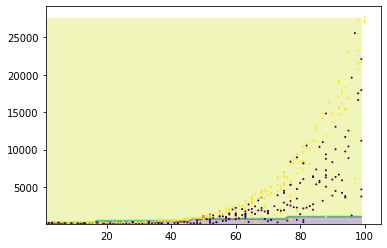

In [76]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(test_x['Horas esperadas'], test_x['Precio'], c = test_y, s = 1);